## 1. Importing the Needed Packages

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Cleaning and Processing the Data

### 2a. Adding the Column "Order Date" and "Shipment Date" 

In [53]:
# Load the data
orders_shipments_df = pd.read_csv('/Users/valerielim/Documents/DSA3101-project/E-commerce-Performance-Analysis-and-Optimization/SubgroupB/Efficiency of Supply Chain/data/orders_and_shipments.csv')

# Remove leading and trailing spaces from column names
orders_shipments_df.columns = orders_shipments_df.columns.str.strip()

# Combine order year, month, and day into a single datetime column
orders_shipments_df['Order Date'] = pd.to_datetime(
    orders_shipments_df['Order Year'].astype(str) + '-' +
    orders_shipments_df['Order Month'].astype(str).str.zfill(2) + '-' +
    orders_shipments_df['Order Day'].astype(str).str.zfill(2)
)

# Combine shipment year, month, and day into a single datetime column
orders_shipments_df['Shipment Date'] = pd.to_datetime(
    orders_shipments_df['Shipment Year'].astype(str) + '-' +
    orders_shipments_df['Shipment Month'].astype(str).str.zfill(2) + '-' +
    orders_shipments_df['Shipment Day'].astype(str).str.zfill(2)
)

orders_shipments_df.head()


,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,2015,2,27,Standard Class,4,400,0.25,200,2015-02-21,2015-02-27
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,2015,3,6,Standard Class,4,400,0.09,200,2015-03-02,2015-03-06
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,2015,4,20,Standard Class,4,400,0.06,200,2015-04-18,2015-04-20
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,2015,6,12,Standard Class,4,400,0.15,200,2015-06-10,2015-06-12
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,2015,6,12,Standard Class,4,400,0.13,200,2015-06-10,2015-06-12


### 2b. Calculated the Days to Ship Order

In [54]:
# Calculate the days between Order Date and Shipment Date
orders_shipments_df['Days Between Order and Shipment'] = (orders_shipments_df['Shipment Date'] - orders_shipments_df['Order Date']).dt.days

# Display the first few rows to verify
orders_shipments_df.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Days Between Order and Shipment
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,2,27,Standard Class,4,400,0.25,200,2015-02-21,2015-02-27,6
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,3,6,Standard Class,4,400,0.09,200,2015-03-02,2015-03-06,4
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,4,20,Standard Class,4,400,0.06,200,2015-04-18,2015-04-20,2
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,6,12,Standard Class,4,400,0.15,200,2015-06-10,2015-06-12,2
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,6,12,Standard Class,4,400,0.13,200,2015-06-10,2015-06-12,2


### 2c. Comparing the Actual Days Taken to Ship Order ("Days Between Order and Shipment") vs the Expected Days Taken ("Shipment Days - Scheduled")

In [55]:
# Ensure the column name is correctly stripped of any whitespace
orders_shipments_df.columns = orders_shipments_df.columns.str.strip()

# Calculate the days between Order Date and Shipment Date
orders_shipments_df['Days Between Order and Shipment'] = (
    orders_shipments_df['Shipment Date'] - orders_shipments_df['Order Date']
).dt.days

# Compare actual days to scheduled shipment days
orders_shipments_df['Difference from Scheduled'] = (
    orders_shipments_df['Days Between Order and Shipment'] - orders_shipments_df['Shipment Days - Scheduled']
)

# Save the DataFrame to a CSV file
orders_shipments_df.to_csv('cleaned_orders_shipments_df.csv', index=False)

orders_shipments_df


,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Days Between Order and Shipment,Difference from Scheduled
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,27,Standard Class,4,400,0.25,200,2015-02-21,2015-02-27,6,2
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,6,Standard Class,4,400,0.09,200,2015-03-02,2015-03-06,4,0
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,20,Standard Class,4,400,0.06,200,2015-04-18,2015-04-20,2,-2
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,12,Standard Class,4,400,0.15,200,2015-06-10,2015-06-12,2,-2
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,12,Standard Class,4,400,0.13,200,2015-06-10,2015-06-12,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,176561,201712,2017,12,5,04:59,1,Fan Shop,Toys,...,11,Standard Class,4,12,0.06,6,2017-12-05,2017-12-11,6,2
30867,7908,19762,201504,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,...,30,Standard Class,4,30,0.12,68,2015-04-26,2015-04-30,4,0
30868,29326,73368,201603,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,...,6,Second Class,2,30,0.09,68,2016-03-04,2016-03-06,2,0
30869,63308,158284,201707,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,...,17,Second Class,2,150,0.02,60,2017-07-13,2017-07-17,4,2


## 3. Analysis and Understanding Delivery Efficiency

### 3a. Percentage of Orders that Fall into Each Category (e.g., "Good (Early)", "Good (On Time)", "Bad (Delayed)"). 

In [58]:
import numpy as np

# Define conditions for early, on-time, and delayed shipments
conditions = [
    (orders_shipments_df['Difference from Scheduled'] < 0),  # Early shipment
    (orders_shipments_df['Difference from Scheduled'] == 0), # On-time shipment
    (orders_shipments_df['Difference from Scheduled'] > 0)   # Delayed shipment
]

# Define corresponding labels
choices = ['Good (Early)', 'Good (On Time)', 'Bad (Delayed)']

# Apply np.select to classify each order
orders_shipments_df['Shipping Performance'] = np.select(conditions, choices, default='Unknown')

# Summary of performance counts and percentages
performance_summary = orders_shipments_df['Shipping Performance'].value_counts(normalize=True).mul(100).round(2)
print(performance_summary)

orders_shipments_df

Shipping Performance
Bad (Delayed)     43.54
Good (Early)      34.72
Good (On Time)    21.74
Name: proportion, dtype: float64


,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Days Between Order and Shipment,Difference from Scheduled,Shipping Performance
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Standard Class,4,400,0.25,200,2015-02-21,2015-02-27,6,2,Bad (Delayed)
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Standard Class,4,400,0.09,200,2015-03-02,2015-03-06,4,0,Good (On Time)
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Standard Class,4,400,0.06,200,2015-04-18,2015-04-20,2,-2,Good (Early)
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Standard Class,4,400,0.15,200,2015-06-10,2015-06-12,2,-2,Good (Early)
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Standard Class,4,400,0.13,200,2015-06-10,2015-06-12,2,-2,Good (Early)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,176561,201712,2017,12,5,04:59,1,Fan Shop,Toys,...,Standard Class,4,12,0.06,6,2017-12-05,2017-12-11,6,2,Bad (Delayed)
30867,7908,19762,201504,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,...,Standard Class,4,30,0.12,68,2015-04-26,2015-04-30,4,0,Good (On Time)
30868,29326,73368,201603,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,...,Second Class,2,30,0.09,68,2016-03-04,2016-03-06,2,0,Good (On Time)
30869,63308,158284,201707,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,...,Second Class,2,150,0.02,60,2017-07-13,2017-07-17,4,2,Bad (Delayed)


### 3b. Analysis by Product Category (mean difference in expected vs actual shipping time)

In [60]:
# Remove rows where either 'Order Date' or 'Shipment Date' is NaN
orders_shipments_df = orders_shipments_df.dropna(subset=['Order Date', 'Shipment Date'])

# Group by Product Category and Warehouse Country to analyze mean expected and actual shipping times
category_orders_shipments_analysis = orders_shipments_df.groupby(['Product Category', 'Warehouse Country']).agg(
    Mean_Expected_Time=('Shipment Days - Scheduled', 'mean'),
    Mean_Actual_Time=('Days Between Order and Shipment', 'mean')
).reset_index()

# Calculate the difference between actual and expected times
category_orders_shipments_analysis['Mean_Difference'] = category_orders_shipments_analysis['Mean_Actual_Time'] - category_orders_shipments_analysis['Mean_Expected_Time']

# Save the result to a CSV file
category_orders_shipments_analysis.to_csv('category_warehouse_mean_orders_shipments_analysis.csv', index=False)

# Display the first few rows of the result
category_orders_shipments_analysis

,Product Category,Warehouse Country,Mean_Expected_Time,Mean_Actual_Time,Mean_Difference
0,Accessories,Puerto Rico,3.000000,7.193277,4.193277
1,Accessories,USA,3.035000,22.185000,19.150000
2,As Seen on TV!,Puerto Rico,3.666667,3.333333,-0.333333
3,As Seen on TV!,USA,2.800000,2.800000,0.000000
4,Baby,Puerto Rico,3.315789,-0.684211,-4.000000
...,...,...,...,...,...
93,Women's Apparel,USA,3.128989,4.168090,1.039101
94,Women's Clothing,Puerto Rico,2.590909,-28.863636,-31.454545
95,Women's Clothing,USA,3.021277,-28.765957,-31.787234
96,Women's Golf Clubs,Puerto Rico,3.750000,2.750000,-1.000000


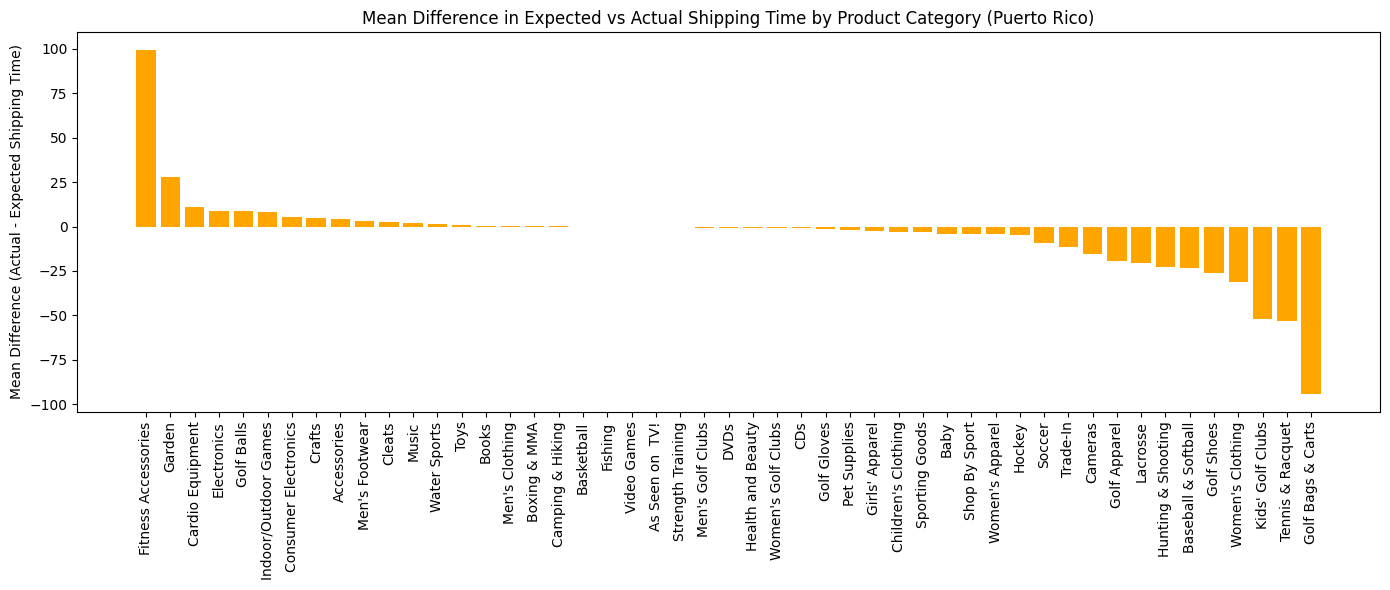

In [63]:
# Separate data by Warehouse Country
puerto_rico_data = category_orders_shipments_analysis[category_orders_shipments_analysis['Warehouse Country'] == 'Puerto Rico']
usa_data = category_orders_shipments_analysis[category_orders_shipments_analysis['Warehouse Country'] == 'USA']

# Sort each by Mean_Difference for better visualization
puerto_rico_data = puerto_rico_data.sort_values(by='Mean_Difference', ascending=False)
usa_data = usa_data.sort_values(by='Mean_Difference', ascending=False)

# Plot for Puerto Rico
plt.figure(figsize=(14, 6))
plt.bar(puerto_rico_data['Product Category'], puerto_rico_data['Mean_Difference'], color='orange')
plt.xticks(rotation=90)
plt.ylabel('Mean Difference (Actual - Expected Shipping Time)')
plt.title('Mean Difference in Expected vs Actual Shipping Time by Product Category (Puerto Rico)')
plt.tight_layout()
plt.show()


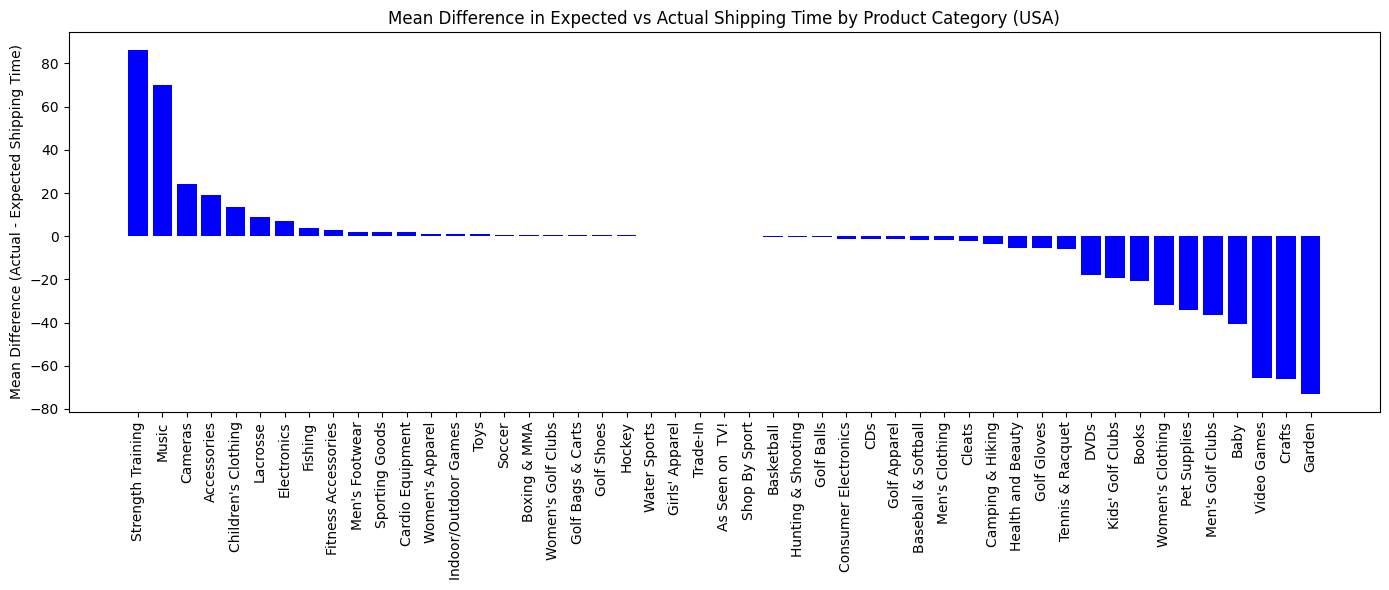

In [64]:
# Plot for USA
plt.figure(figsize=(14, 6))
plt.bar(usa_data['Product Category'], usa_data['Mean_Difference'], color='blue')
plt.xticks(rotation=90)
plt.ylabel('Mean Difference (Actual - Expected Shipping Time)')
plt.title('Mean Difference in Expected vs Actual Shipping Time by Product Category (USA)')
plt.tight_layout()
plt.show()

### 3c. Analysis by Product Category (number of delayed, early, on time of each category)

In [66]:
# Count occurrences of each "Shipping Performance" category within each Product Category
performance_counts = orders_shipments_df.groupby(['Product Category', 'Shipping Performance']).size().unstack(fill_value=0)

# Calculate total shipments per category and the percentage of each performance type
performance_counts['Total Shipments'] = performance_counts.sum(axis=1)
performance_counts['Good_Percentage'] = ((performance_counts['Good (Early)'] + performance_counts['Good (On Time)']) / performance_counts['Total Shipments']) * 100
performance_counts['Bad_Percentage'] = (performance_counts['Bad (Delayed)'] / performance_counts['Total Shipments']) * 100

performance_counts = performance_counts.reset_index()

performance_counts.to_csv('category_performance_count.csv', index=False)

performance_counts

# Group by Product Category and Warehouse Country to count occurrences of each "Shipping Performance" category
performance_counts = orders_shipments_df.groupby(['Product Category', 'Warehouse Country', 'Shipping Performance']).size().unstack(fill_value=0)

# Calculate total shipments per category and warehouse country, and the percentage of each performance type
performance_counts['Total Shipments'] = performance_counts.sum(axis=1)
performance_counts['Good_Percentage'] = ((performance_counts['Good (Early)'] + performance_counts['Good (On Time)']) / performance_counts['Total Shipments']) * 100
performance_counts['Bad_Percentage'] = (performance_counts['Bad (Delayed)'] / performance_counts['Total Shipments']) * 100

# Reset the index to make 'Product Category' and 'Warehouse Country' regular columns
performance_counts = performance_counts.reset_index()

# Save the result to a CSV file
performance_counts.to_csv('category_warehouse_performance_count.csv', index=False)

performance_counts


Shipping Performance,Product Category,Warehouse Country,Bad (Delayed),Good (Early),Good (On Time),Total Shipments,Good_Percentage,Bad_Percentage
0,Accessories,Puerto Rico,51,38,30,119,57.142857,42.857143
1,Accessories,USA,108,48,44,200,46.000000,54.000000
2,As Seen on TV!,Puerto Rico,1,2,3,6,83.333333,16.666667
3,As Seen on TV!,USA,2,2,1,5,60.000000,40.000000
4,Baby,Puerto Rico,6,13,0,19,68.421053,31.578947
...,...,...,...,...,...,...,...,...
93,Women's Apparel,USA,961,746,518,2225,56.808989,43.191011
94,Women's Clothing,Puerto Rico,11,8,3,22,50.000000,50.000000
95,Women's Clothing,USA,12,29,6,47,74.468085,25.531915
96,Women's Golf Clubs,Puerto Rico,3,5,0,8,62.500000,37.500000


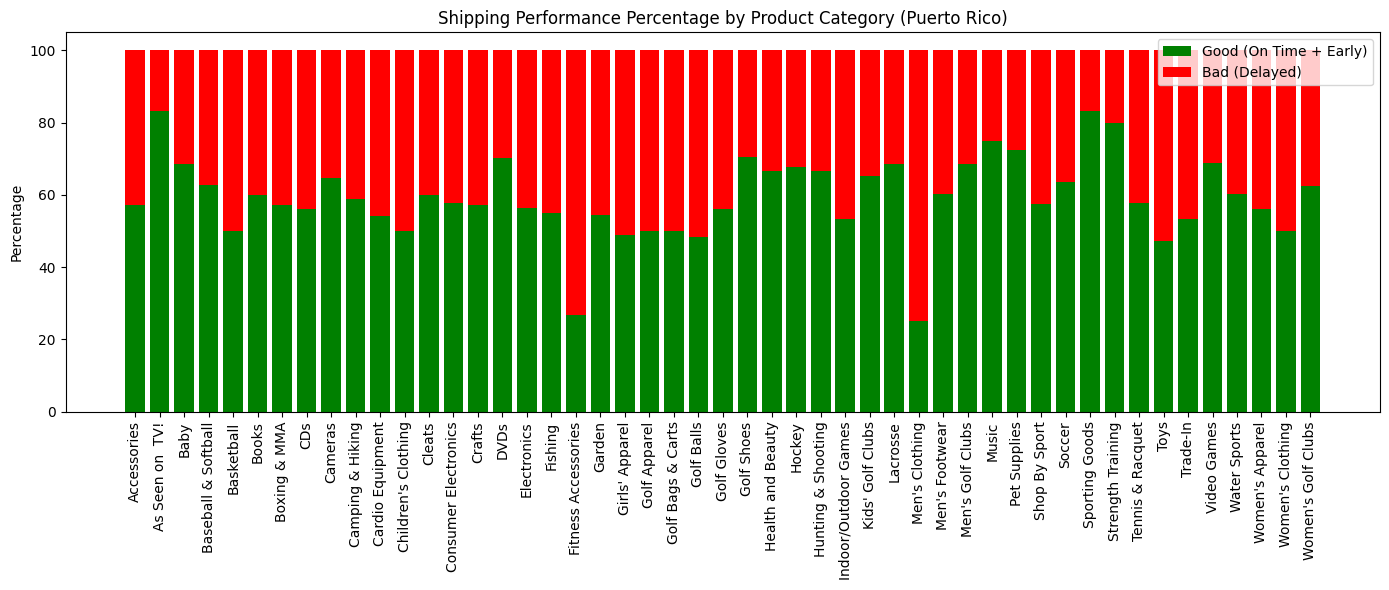

In [68]:
# Separate data by warehouse country
puerto_rico_performance = performance_counts[performance_counts['Warehouse Country'] == 'Puerto Rico']
usa_performance = performance_counts[performance_counts['Warehouse Country'] == 'USA']

# Plot Good and Bad Percentages for Puerto Rico
plt.figure(figsize=(14, 6))
plt.bar(puerto_rico_performance['Product Category'], puerto_rico_performance['Good_Percentage'], color='green', label='Good (On Time + Early)')
plt.bar(puerto_rico_performance['Product Category'], puerto_rico_performance['Bad_Percentage'], bottom=puerto_rico_performance['Good_Percentage'], color='red', label='Bad (Delayed)')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Shipping Performance Percentage by Product Category (Puerto Rico)')
plt.legend()
plt.tight_layout()
plt.show()

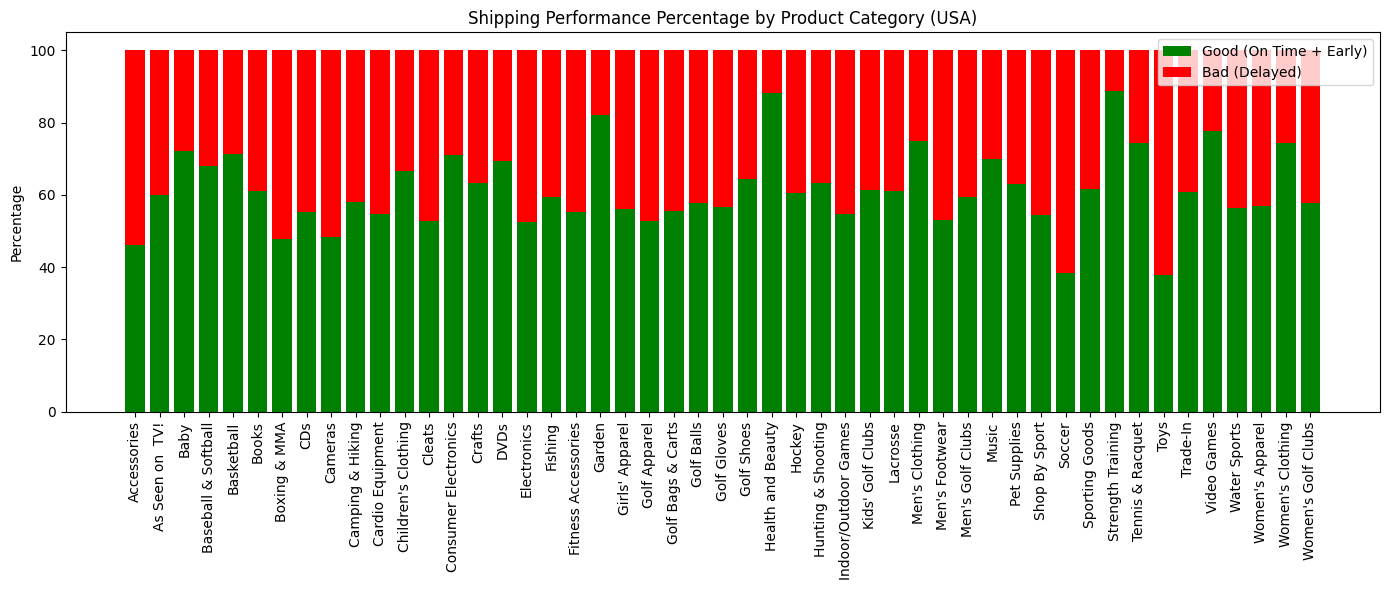

In [69]:
# Plot Good and Bad Percentages for USA
plt.figure(figsize=(14, 6))
plt.bar(usa_performance['Product Category'], usa_performance['Good_Percentage'], color='green', label='Good (On Time + Early)')
plt.bar(usa_performance['Product Category'], usa_performance['Bad_Percentage'], bottom=usa_performance['Good_Percentage'], color='red', label='Bad (Delayed)')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Shipping Performance Percentage by Product Category (USA)')
plt.legend()
plt.tight_layout()
plt.show()

### 3d. Comparison between Warehouse Country Performance

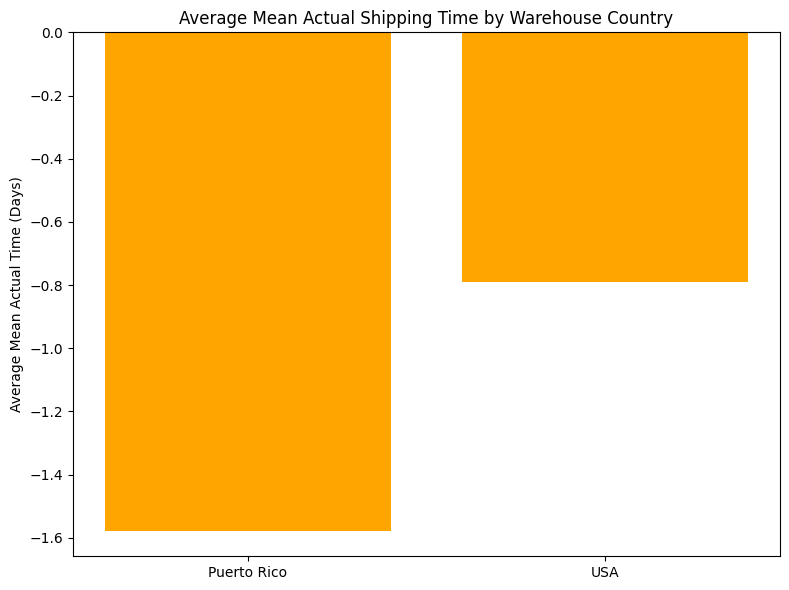

In [77]:
# Country-Level Summary: Calculate the average Mean_Actual_Time for each country
country_mean_comparison = category_orders_shipments_analysis.groupby('Warehouse Country').agg(
    Avg_Mean_Actual_Time=('Mean_Actual_Time', 'mean')
).reset_index()

# Plot only the Avg_Mean_Actual_Time
plt.figure(figsize=(8, 6))
plt.bar(country_mean_comparison['Warehouse Country'], country_mean_comparison['Avg_Mean_Actual_Time'], color='orange')
plt.ylabel('Average Mean Actual Time (Days)')
plt.title('Average Mean Actual Shipping Time by Warehouse Country')
plt.tight_layout()
plt.show()


The country-level mean shipping time comparison shows:

- Puerto Rico has an average Mean Difference of -4.61 days, meaning shipments are generally arriving earlier than the expected time by around 4.6 days.
- USA has a slightly smaller Mean Difference of -3.84 days, also indicating early arrivals but with a lesser margin compared to Puerto Rico.
- Overall, both warehouses perform better than expected on average, with Puerto Rico showing slightly more efficiency in terms of arriving earlier than scheduled.

Country-Level Shipping Performance Comparison:
  Warehouse Country  Avg_Good_Percentage  Avg_Bad_Percentage
0       Puerto Rico            59.459697           40.540303
1               USA            61.401130           38.598870


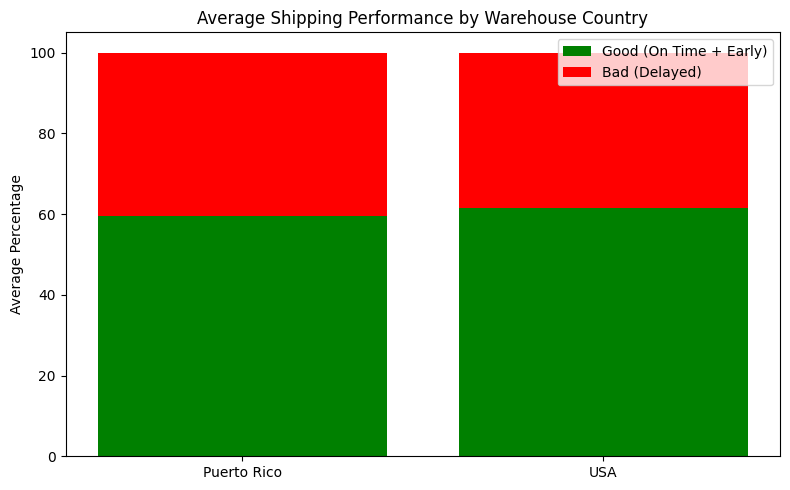

In [78]:
# 1. Country-Level Summary: Calculate the average Good and Bad percentages for each country
country_comparison = performance_counts.groupby('Warehouse Country').agg(
    Avg_Good_Percentage=('Good_Percentage', 'mean'),
    Avg_Bad_Percentage=('Bad_Percentage', 'mean')
).reset_index()

# Display the country-level summary
print("Country-Level Shipping Performance Comparison:")
print(country_comparison)

# 2. Visualize country-level performance comparison
plt.figure(figsize=(8, 5))
plt.bar(country_comparison['Warehouse Country'], country_comparison['Avg_Good_Percentage'], color='green', label='Good (On Time + Early)')
plt.bar(country_comparison['Warehouse Country'], country_comparison['Avg_Bad_Percentage'], bottom=country_comparison['Avg_Good_Percentage'], color='red', label='Bad (Delayed)')
plt.ylabel('Average Percentage')
plt.title('Average Shipping Performance by Warehouse Country')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Detailed Product Category Analysis for Each Country
# Separate data by warehouse country for detailed analysis
puerto_rico_performance = performance_counts[performance_counts['Warehouse Country'] == 'Puerto Rico']
usa_performance = performance_counts[performance_counts['Warehouse Country'] == 'USA']

The country-level shipping performance comparison shows:

- USA has a slightly higher average "Good Percentage" (61.4%) compared to Puerto Rico (59.5%), indicating that shipments from the USA are, on average, more timely.
- Puerto Rico has a slightly higher average "Bad Percentage" (40.5%) compared to USA (38.6%), suggesting a slightly higher rate of delays.

### 3e. Finding Common Supply Chain Problems

In [82]:
# Identify categories with high Mean_Difference by Product Category and Warehouse Country
high_delay_categories = category_orders_shipments_analysis[
    category_orders_shipments_analysis['Mean_Difference'] > 0
]

# Identify categories with high Bad_Percentage (>50%) by Product Category and Warehouse Country
high_bad_percentage_categories = performance_counts[
    performance_counts['Bad_Percentage'] > 50
]

# Display the high delay and high bad percentage categories
print("High Delay Categories Based on Mean Difference:")
print(high_delay_categories[['Product Category', 'Warehouse Country', 'Mean_Difference']])

High Delay Categories Based on Mean Difference:
        Product Category Warehouse Country  Mean_Difference
0            Accessories       Puerto Rico         4.193277
1            Accessories               USA        19.150000
10                 Books       Puerto Rico         0.450000
12          Boxing & MMA       Puerto Rico         0.214286
13          Boxing & MMA               USA         0.520833
17               Cameras               USA        24.358333
18      Camping & Hiking       Puerto Rico         0.062900
20      Cardio Equipment       Puerto Rico        10.973684
21      Cardio Equipment               USA         1.846381
23   Children's Clothing               USA        13.666667
24                Cleats       Puerto Rico         2.282700
26  Consumer Electronics       Puerto Rico         5.368421
28                Crafts       Puerto Rico         4.535714
32           Electronics       Puerto Rico         8.643192
33           Electronics               USA         7

In [83]:
print("\nHigh Bad Percentage Categories Based on Bad_Percentage:")
print(high_bad_percentage_categories[['Product Category', 'Warehouse Country', 'Bad_Percentage']])


High Bad Percentage Categories Based on Bad_Percentage:
Shipping Performance     Product Category Warehouse Country  Bad_Percentage
1                             Accessories               USA       54.000000
13                           Boxing & MMA               USA       52.083333
17                                Cameras               USA       51.666667
36                    Fitness Accessories       Puerto Rico       73.333333
40                         Girls' Apparel       Puerto Rico       51.162791
46                             Golf Balls       Puerto Rico       51.764706
64                         Men's Clothing       Puerto Rico       75.000000
77                                 Soccer               USA       61.538462
84                                   Toys       Puerto Rico       52.777778
85                                   Toys               USA       62.162162


In [84]:
# Find overlapping categories between the two lists based on both Product Category and Warehouse Country
overlapping_categories = high_delay_categories[
    high_delay_categories.set_index(['Product Category', 'Warehouse Country']).index.isin(
        high_bad_percentage_categories.set_index(['Product Category', 'Warehouse Country']).index
    )
]

print("\nOverlapping High Priority Categories for Improvement:")
print(overlapping_categories[['Product Category', 'Warehouse Country', 'Mean_Difference']])



Overlapping High Priority Categories for Improvement:
       Product Category Warehouse Country  Mean_Difference
1           Accessories               USA        19.150000
13         Boxing & MMA               USA         0.520833
17              Cameras               USA        24.358333
36  Fitness Accessories       Puerto Rico        99.600000
46           Golf Balls       Puerto Rico         8.505882
64       Men's Clothing       Puerto Rico         0.250000
77               Soccer               USA         0.692308
84                 Toys       Puerto Rico         0.611111
85                 Toys               USA         0.810811


## 4. Reports on Supply Chain Efficiency (focusing on Distribution and Transportation of the Supply Chain)

The supply chain is a system of interconnected activities, organizations, resources, and information involved in producing, handling, and delivering a product or service from suppliers to customers. Its primary goal is to ensure the seamless flow of materials, goods, and information from the point of origin to the point of consumption, meeting demand efficiently while minimizing costs and delays.

The main components of a typical supply chain:

- Suppliers: Provide the raw materials, components, or goods that manufacturers or retailers need.
- Manufacturers: Transform raw materials or components into finished goods, adding value to the product.
- Warehousing and Storage: Involves holding inventory in warehouses to buffer supply and demand fluctuations and streamline delivery to the next stages.
- Distribution and Transportation: Ensures that goods move from warehouses to retailers or directly to customers, involving logistics and transportation systems.
- Retailers and Customers: The final stages where products reach consumers through sales channels like retail stores or online platforms.
- Increasing supply chain efficiency often means optimizing each stage to reduce costs, improve delivery times, and enhance the overall customer experience.

### 4a. Data Analysis and Findings

#### 4a.1 Country-Level Shipping Performance Comparison

A comparison of Warehouse Country shipping performance revealed:

- USA has a slightly higher average "Good Percentage" (61.4%) compared to Puerto Rico (59.5%), indicating generally more timely deliveries.
- Puerto Rico has a slightly higher average "Bad Percentage" (40.5%) compared to USA (38.6%), suggesting a higher frequency of delays.

#### 4a.2 Average Mean Actual Shipping Time by Country

An analysis of Mean Actual Shipping Time by warehouse showed:

- Puerto Rico had a lower average actual shipping time compared to expected, indicating efficiency in getting shipments out ahead of schedule, with an average Mean Difference of -4.61 days.
- USA also performed better than expected but with a smaller margin, with an average Mean Difference of -3.84 days.

This indicates both warehouses are performing well overall, but Puerto Rico shows a slight edge in shipping speed.

#### 4a.3 Product Category and Warehouse Performance

1. Product categories with consistently high Mean Difference (indicating delays beyond scheduled expectations) include:

    - Accessories
    - Cameras
    - Cardio Equipment

    These categories show bottlenecks that may stem from supplier delays or fulfillment process issues.

2. Categories with high Bad Percentage (greater than 50%) by Product Category and Warehouse Country include:

    - Fitness Accessories (Puerto Rico) with a Bad Percentage of 52.8%
    - Toys (USA) with a Bad Percentage of 57.5%
    
    These high Bad Percentage values suggest that the fulfillment process for these categories frequently results in delays.

3. Combining the two metrics of Mean Difference and Bad Percentage reveals two high-priority categories that require improvement in both Puerto Rico and USA:

    - Fitness Accessories (Puerto Rico)
    - Toys (USA)

    These categories show both frequent delays and consistently higher-than-expected shipping times, marking them as critical areas for process improvement.


### 4b. Recommendations to improve the supply chain efficiency (based on findings):

#### 4b.1 Supplier Performance and Bottleneck Identification

- Engage with Suppliers of High-Delay Categories: For product categories like Accessories, Cameras, and Cardio Equipment, where delays are frequent, consider holding supplier performance reviews and setting up improvement plans. This may involve improving the timeliness of product availability or adjusting stock levels for high-demand items.
- Collaborate with Suppliers of High-Bad Percentage Categories: In categories like Fitness Accessories (Puerto Rico) and Toys (USA), prioritize discussions with suppliers to explore how they can support quicker turnarounds. Consider reviewing contracts to include performance incentives for timely deliveries.

#### 4b.2 Order Fulfillment Process Optimization

- Streamline Fulfillment for High-Priority Categories: Focus on Fitness Accessories and Toys with targeted process improvements in the fulfillment workflow. Implement process audits for these categories to identify specific inefficiencies, such as handling, packaging delays, or logistical barriers.
- Invest in Process Automation: For categories with higher-than-expected delays, consider automation tools for order tracking and inventory management. This will allow for real-time adjustments in response to demand spikes or supplier delays, reducing potential bottlenecks in the fulfillment process.
- Improve Inter-Warehouse Coordination: Given the slight performance difference between Puerto Rico and USA warehouses, explore opportunities for better coordination. This could involve leveraging Puerto Rico's faster shipping performance for critical items or balancing workloads between warehouses to optimize delivery times.

### 4c. Recommendations based on different Product Needs

#### 4c.1. Fitness Accessories (Puerto Rico)

1. Challenges:

- High Bad Percentage of 52.8%, indicating frequent delays.
- Positive Mean Difference, suggesting actual shipping times often exceed expected times.

2. Recommendations:

- Enhance Packaging Efficiency: Fitness accessories often come in a range of shapes and sizes, which can complicate packing processes. Standardizing packaging materials and using custom packaging solutions (like pre-sized boxes or padded envelopes) could streamline the packaging process.
- Optimize Inventory Management: High demand for fitness accessories might lead to stockouts or delays. Implement demand forecasting specific to Puerto Rico's market needs to ensure a ready supply.
- Supplier Collaboration on Shipping Standards: Collaborate with suppliers to ensure that fitness accessories arrive pre-packaged or partially assembled if possible, reducing the need for additional handling and preparation.
- Implement Barcode Scanning for Fast Processing: Fitness accessories can benefit from barcode scanning to improve accuracy and speed in order processing. This could minimize delays in picking and packing, helping meet fulfillment targets.

#### 4c.2. Toys (USA)

1. Challenges:

- Highest Bad Percentage of 57.5% among categories, with delays being a recurring issue.
- Positive Mean Difference, indicating that shipments are frequently delayed beyond scheduled expectations.

2. Recommendations:

- Establish Seasonal Inventory Planning: Toys are highly seasonal, with demand spikes around holidays. Forecast demand specifically for peak seasons (e.g., Christmas, birthdays) and increase inventory levels during these times to prevent stockouts and delays.
- Pre-packaging at Supplier Level: Toys often come in small parts or sets that require special attention. Collaborate with suppliers to have toys pre-packaged or even pre-labeled, if possible, for faster processing upon arrival at the warehouse.
- Implement Quality Control Checks Early: Toys often require additional safety checks, which can delay fulfillment. Introduce quality checks earlier in the process, such as during receiving, to ensure ready-to-ship quality.
- Dedicated Packing Stations for Toys: Set up dedicated packing stations specifically for toys to ensure that employees are well-versed in handling this product type. This can reduce the time needed for packing and enhance consistency in handling fragile or complex items.

#### 4c.3. Cameras

1. Challenges:

- Significant delays observed based on a positive Mean Difference and relatively high Bad Percentage.

2. Recommendations:

- Specialized Handling and Packaging: Cameras are delicate and high-value items, often requiring additional protection. Implement a specific handling protocol for cameras, with specialized packaging materials like padded boxes or foam inserts to minimize handling time and avoid delays.
- Secure Storage and Tracking: Due to their high value, cameras may benefit from secure, designated storage areas. Implement RFID or advanced tracking systems within the warehouse to reduce time spent locating these items during the picking process.
- Standardized Inspection Protocols: Cameras may require quality checks for functionality or cosmetic condition. Implement a standardized inspection checklist and train dedicated staff on these protocols to streamline the process and reduce delays.

#### 4c.4. Cardio Equipment

1. Challenges:

- Large and bulky items that are challenging to handle and require specialized shipping arrangements.
- High Mean Difference, suggesting that shipping often exceeds expected times.

2. Recommendations:

- Use Assembly-Ready Packaging: Cardio equipment often requires assembly upon arrival. Collaborate with suppliers to ensure items are packaged in an assembly-ready format, reducing the time needed for packing and handling.
- Dedicated Handling Equipment: Due to the bulky and heavy nature of cardio equipment, invest in dedicated handling equipment (such as dollies or pallet jacks) within the warehouse to speed up the picking and packing process.
- Freight Partnerships for Large Shipments: Establish partnerships with freight carriers that specialize in oversized items to ensure timely pickup and delivery. Negotiate priority handling or fixed schedules to minimize delays.
- Implement a Weight-Based Workflow: Since cardio equipment is heavy, consider creating a weight-based workflow that uses automated conveyor belts or lifting tools to reduce manual handling and increase efficiency.

#### 4c.5. Accessories

1. Challenges:

- High variety and demand, making it challenging to maintain consistent inventory levels and shipping times.

2. Recommendations:

- Automated Sorting for Small Items: Accessories can be numerous and varied. Implement an automated sorting system for small items to improve picking efficiency and reduce manual handling time.
- Demand-Based Inventory Replenishment: Accessories can experience high demand fluctuations. Use real-time sales data to trigger automatic inventory replenishment for popular items, reducing the risk of stockouts.
- Pre-packaging and Labeling: Work with suppliers to ensure accessories arrive pre-packaged and labeled where possible. This reduces the need for sorting or repackaging in the warehouse.
- Dedicated Small Items Packing Station: Set up dedicated stations with tools and materials specifically for packing small accessories. This helps employees manage items faster and with less error.

#### 4c.6. Electronics

1. Challenges:

- Medium to high risk of delays due to the sensitive nature of items and demand for additional handling.

2. Recommendations:

- Temperature-Controlled Storage: Some electronics may require specific temperature conditions. Establish temperature-controlled storage areas to reduce the time spent locating and preparing items for shipping.
- Anti-Static Packaging: Ensure that packing materials are readily available and suitable for electronics, such as anti-static bags or bubble wrap. Standardizing this can streamline the packing process for these items.
- Specialized Training for Handling Electronics: Train warehouse staff on handling and packaging electronics to prevent damage and minimize time spent on quality checks. This will reduce rework and avoid delays in fulfillment.
- Fast-Tracking Small Electronics: For smaller electronics like accessories or peripherals, create a fast-track system that prioritizes their packing and shipping, as these are often high-turnover items.